In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics import tsaplots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#take the Date and Time strings and convert into one datetime column
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')

In [4]:
fn = 'Full_Electric_Interval_042016.csv'
chunksize = 10000
dfc = pd.read_csv(fn, chunksize=chunksize,header=3, parse_dates={'datetime': ['Date', 'Start Time']}, \
                  date_parser=dateparse,index_col=0)

In [5]:
df = pd.concat([chunk for chunk in dfc])

In [52]:
df.Meter.unique()

array(['A71 Mitchell Hospital (B1)', 'A06 Crerar Library (B1)',
       'F02 Steam Plant (B1)', 'G02 Capin Hall (B1)',
       'D36 Social Science Building (B1)', 'A75 DCAM (R1)',
       'A75 DCAM (R2)', 'H01 Computers 1155 Building (B1)',
       'A11 Kovler Laboratories (B1)', 'A08 Hinds Laboratories (R1)',
       'A75 DCAM (R3)', 'A84 American School (B1)',
       'A62 Cummings Life Sciences (B1)', 'A13 Bookstore (B1)',
       'H02 Law School (B1)', 'A22 Carlson Animal Research (B4)',
       'F02 Steam Plant (B2)', 'C02 Crown Field House (B1)',
       'E21 Breckinridge House (B1)', 'A27 Chicago Lying Hospital (B1)',
       'A14 Brain Research Pavilion (B1)',
       'D14 Center Gender Studies (B1)', 'L07 5482 S. Greenwood Ave (R1)',
       'A23 Billings Hospital (B1)', 'A17 Wyler Child Hospital (B1)',
       'D25 Walker Museum (R1)', 'D25 Walker Museum (R2)',
       'I13 Woodlawn Social Service (B1)', 'A16 Peck Pavilion (B1)',
       'D53 Pick Hall (R1)', 'N11 ATS (B1)',
       'B34 Sta

In [53]:
df1 = df.copy()

In [55]:
df1.Meter.unique()

array(['A71 Mitchell Hospital', 'A06 Crerar Library', 'F02 Steam Plant',
       'G02 Capin Hall', 'D36 Social Science Building', 'A75 DCAM',
       'H01 Computers 1155 Building', 'A11 Kovler Laboratories',
       'A08 Hinds Laboratories', 'A84 American School',
       'A62 Cummings Life Sciences', 'A13 Bookstore', 'H02 Law School',
       'A22 Carlson Animal Research', 'C02 Crown Field House',
       'E21 Breckinridge House', 'A27 Chicago Lying Hospital',
       'A14 Brain Research Pavilion', 'D14 Center Gender Studies',
       'L07 5482 S. Greenwood Ave', 'A23 Billings Hospital',
       'A17 Wyler Child Hospital', 'D25 Walker Museum',
       'I13 Woodlawn Social Service', 'A16 Peck Pavilion', 'D53 Pick Hall',
       'N11 ATS', 'B34 Stagg Field Building', 'D16 Eckhart/Ryerson',
       'C31 54th & Ellis Parking', 'D20 Levi Hall',
       'I10 6022-24 S. Drexel', 'B36 BSLC', 'A50 MRS Building (CLSC)',
       'E44 Booth Harper Center', 'D37 Stuart Hall',
       'D06 Anatomy Building', 'G03

In [93]:
df2 = pd.concat([df_final, usage])

NameError: name 'df2' is not defined

In [54]:
df1.Meter = df1.Meter.map(lambda x: " ".join(x.split()[:-1]))

In [90]:
crerar=df1[df1.Meter == 'A06 Crerar Library'] 
usage = crerar.resample("H", label = 'right', closed = 'right').apply({'Meter':'max','Usage': sum, 'Temperature':'mean'})

In [92]:
df_final = pd.DataFrame()

In [36]:
df.Meter.unique()

array(['A71 Mitchell Hospital (B1)', 'A06 Crerar Library (B1)',
       'F02 Steam Plant (B1)', 'G02 Capin Hall (B1)',
       'D36 Social Science Building (B1)', 'A75 DCAM (R1)',
       'A75 DCAM (R2)', 'H01 Computers 1155 Building (B1)',
       'A11 Kovler Laboratories (B1)', 'A08 Hinds Laboratories (R1)',
       'A75 DCAM (R3)', 'A84 American School (B1)',
       'A62 Cummings Life Sciences (B1)', 'A13 Bookstore (B1)',
       'H02 Law School (B1)', 'A22 Carlson Animal Research (B4)',
       'F02 Steam Plant (B2)', 'C02 Crown Field House (B1)',
       'E21 Breckinridge House (B1)', 'A27 Chicago Lying Hospital (B1)',
       'A14 Brain Research Pavilion (B1)',
       'D14 Center Gender Studies (B1)', 'L07 5482 S. Greenwood Ave (R1)',
       'A23 Billings Hospital (B1)', 'A17 Wyler Child Hospital (B1)',
       'D25 Walker Museum (R1)', 'D25 Walker Museum (R2)',
       'I13 Woodlawn Social Service (B1)', 'A16 Peck Pavilion (B1)',
       'D53 Pick Hall (R1)', 'N11 ATS (B1)',
       'B34 Sta

In [71]:
hinds = []
for meter in df.Meter.unique():
    if 'Hinds' in meter:
        hinds.append(meter)

In [12]:
for meter in df.Meter.unique():
    df.Usage[df.Meter == meter].resample("H").sum()
    df.Temperature[df.Meter == meter].resample("H").mean()
    

In [72]:
crerar = df[df.Meter.isin(hinds)]

In [64]:
crerar

,Type,Meter,Usage,Usage Unit,Temperature,Temperature Unit
datetime,,,,,,
2014-04-24 12:00:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,62.0,F
2014-04-24 12:30:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,62.0,F
2014-04-24 13:00:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,62.0,F
2014-04-24 13:30:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,62.0,F
2014-04-24 14:00:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,61.0,F
2014-04-24 14:30:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,61.0,F
2014-04-24 15:00:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,60.0,F
2014-04-24 15:30:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,60.0,F
2014-04-24 16:00:00,Electric Usage,A08 Hinds Laboratories (U2),NaN,kWh,58.0,F


In [73]:
crerardaily = crerar.resample('H', how = 'mean')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


In [74]:
crerarmax = crerar.resample('H', how = 'max')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  if __name__ == '__main__':


In [75]:
crerarmin = crerar.resample('H', how = 'min')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).min()
  if __name__ == '__main__':


In [79]:
minmax = {'Max Usage': crerarmax.Usage, 'Avg Usage' : crerardaily.Usage, 'Temp' : crerardaily.Temperature}

In [80]:
crerarminmax = pd.DataFrame(minmax, index = crerardaily.index)

### Daily Minimum/Maximum Usage

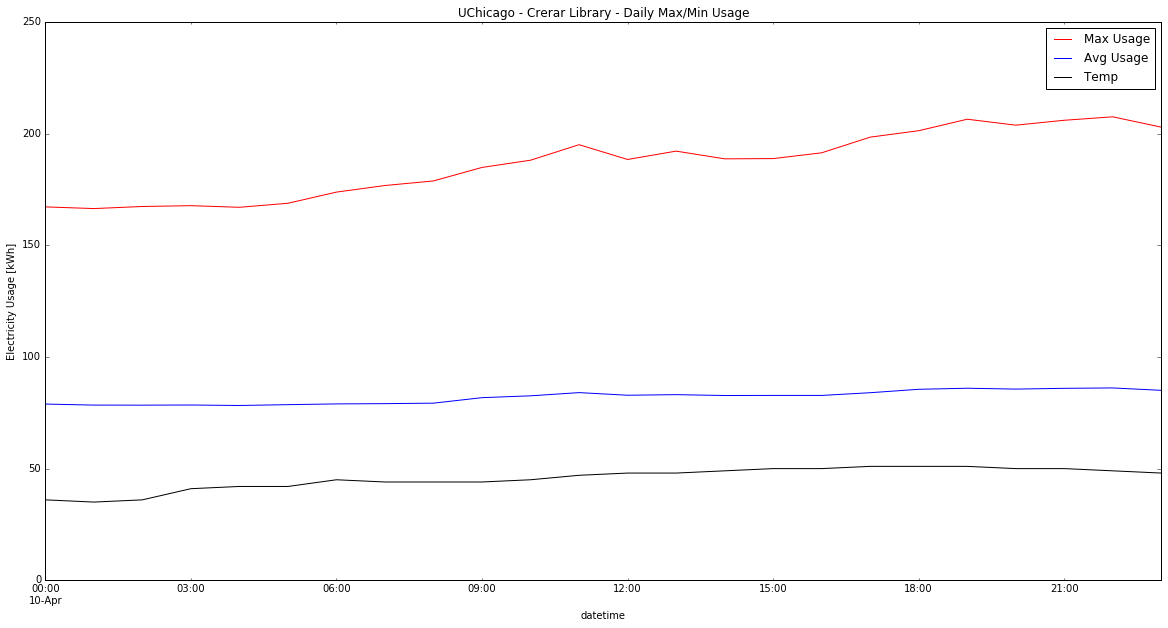

In [82]:
#Fluctuations of minimum and maximum daily usage compared to average daily temperature.
ax=crerarminmax[-24:].plot(y=['Max Usage', 'Avg Usage', 'Temp'],color=['red', 'blue', 'black'])
fig = ax.get_figure()
ax.set_title('UChicago - Crerar Library - Daily Max/Min Usage')
ax.set_ylabel('Electricity Usage [kWh]')
fig.set_figwidth(20)
fig.set_figheight(10)
# fig.savefig('plots/crerar_daily.png')
# plt.close(fig)

### Autocorrelation Plot

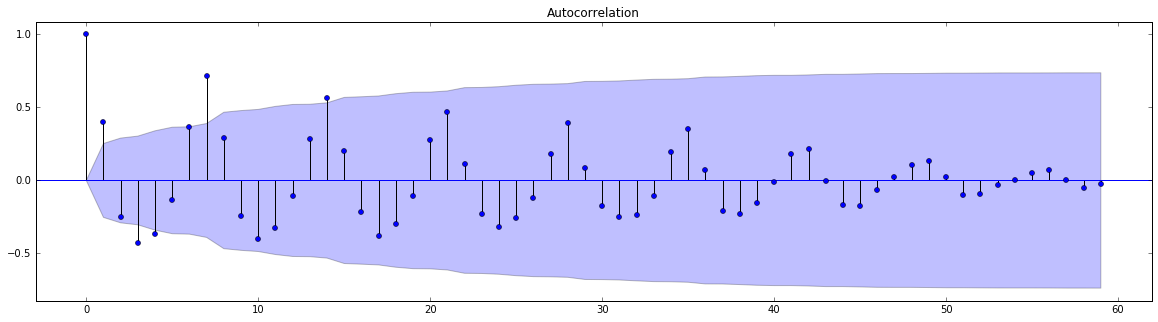

In [12]:
fig = tsaplots.plot_acf(crerardaily.Usage[-60:], ax = None)
fig.set_figwidth(20)
fig.set_figheight(5)

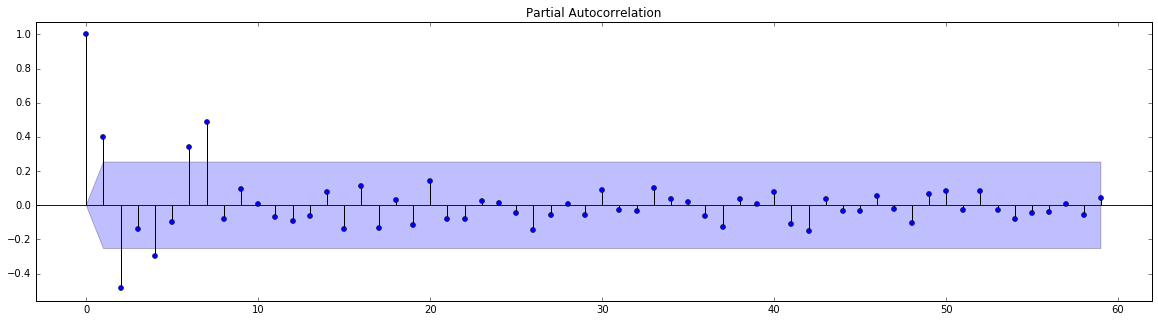

In [13]:
fig = tsaplots.plot_pacf(crerardaily.Usage[-60:], ax = None)
fig.set_figwidth(20)
fig.set_figheight(5)

In [107]:
dates = ['2014-04-10', '2014-06-04', '2014-06-14',
'2014-06-23', '2014-08-31', '2014-09-28', '2014-12-03',
'2014-12-13', '2015-01-04', '2015-03-11', '2015-03-21',
'2015-03-29', '2015-06-03', '2015-06-13', '2015-06-21',
'2015-08-29', '2015-09-27', '2015-12-03', '2015-12-12',
'2016-01-03', '2016-03-09', '2016-03-19', '2016-03-27',
'2016-05-10']

In [99]:
labels = ['Spring 14', 'Reading/Exam Spring 14', 'Break Spring 14',
'Summer 14', 'Break Summer 14', 'Fall 14', 'Reading/Exam Fall 14',
'Break Fall 14', 'Winter 15', 'Reading/Exam Winter 15', 'Break Winter 15',
'Spring 15', 'Reading/Exam Spring 15', 'Break Spring 15', 'Summer 15',
'Break Summer 15', 'Fall 15', 'Reading/Exam Fall 15', 'Break Fall 15',
'Winter 16', 'Reading/Exam Winter 16', 'Break Winter 16', 'Spring 16']

In [103]:
print(len(dates))
print(len(labels))

24
23


In [108]:
i = 0
uniquedays = []
terms = []
for date in df1.index.unique():
    if (str(date) > dates[i]) and (str(date) <= dates[i + 1]):
        terms.append(labels[i])
        uniquedays.append(date)
    else:
        i += 1
        print(date)
        print(i)
        terms.append(labels[i])
        uniquedays.append(date)

2014-06-04 00:00:00
1
2014-06-14 00:00:00
2
2014-06-23 00:00:00
3
2014-08-31 00:00:00
4
2014-09-28 00:00:00
5
2014-12-03 00:00:00
6
2014-12-13 00:00:00
7
2015-01-04 00:00:00
8
2015-03-11 00:00:00
9
2015-03-21 00:00:00
10
2015-03-29 00:00:00
11
2015-06-03 00:00:00
12
2015-06-13 00:00:00
13
2015-06-21 00:00:00
14
2015-08-29 00:00:00
15
2015-09-27 00:00:00
16
2015-12-03 00:00:00
17
2015-12-12 00:00:00
18
2016-01-03 00:00:00
19
2016-03-09 00:00:00
20
2016-03-19 00:00:00
21
2016-03-27 00:00:00
22


In [24]:
termlabels = dict(zip(uniquedays, terms))

In [26]:
df['Term'] = df['Date'].map(termlabels)